In [1]:
"""@author Okorie Ndubuisi May 2025"""
import numpy as np
import matplotlib.pyplot as plt
from model import Model
import seaborn as sns
import pandas as pd
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
sns.set_theme()

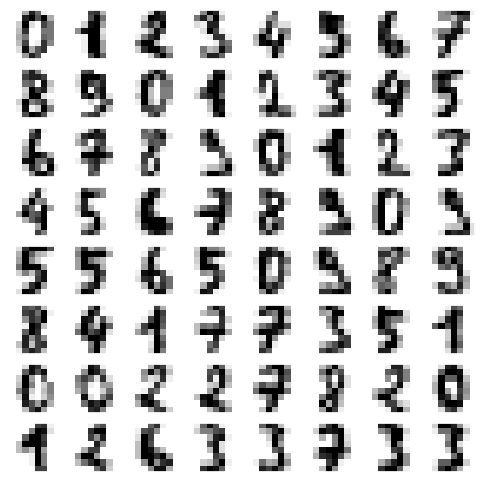

In [2]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [30]:
X = np.array(digits.data[:200, :], dtype=np.float64)
Y = digits.target[:200]
Y
X = X.T

X_test = digits.data[200:, :]
X_test = X_test.T
Y_true = digits.target[200:]

In [5]:
print(X.shape)
print(Y.shape)

(64, 200)
(200,)


In [27]:
input_shape = X.shape
print(input_shape)

(64, 200)


In [32]:
layers = [7, 5, 6, 10]
activations = ['tanh', 'tanh', 'tanh', 'softmax']
model = Model(input_shape, layers, activations)

In [33]:
num_iters = 100000
learning_rate = 1e-8
decay=False
normalized = False
optimizer = 'adam'
model.fit(X, Y, num_iters=num_iters, 
          learning_rate=learning_rate,
            tuning_param=1,
            optimizer=optimizer,
              decay=decay, normalized=normalized)

Running epoch 1 / 1
Running mini-batch 1 / 1
Iteration    0: Cost 119.12850669   
Iteration 10000: Cost 119.12232981   
Iteration 20000: Cost 119.11610007   
Iteration 30000: Cost 119.11001281   
Iteration 40000: Cost 119.10402328   
Iteration 50000: Cost 119.09804303   
Iteration 60000: Cost 119.09212497   
Iteration 70000: Cost 119.08622268   
Iteration 80000: Cost 119.08035714   
Iteration 90000: Cost 119.07461992   
Iteration 99999: Cost 119.06922638   


In [26]:
test_predictions = model.predict(X_test)

In [30]:
test_predictions.shape

(10, 1597)

In [27]:
train_predictions = model.predict(X)

In [29]:
train_predictions.shape

(10, 200)

In [31]:
testpredictions = np.argmax(test_predictions, axis=0)

In [32]:
testpredictions.shape

(1597,)

In [33]:
testpredictions

array([8, 8, 7, ..., 8, 7, 8])

In [34]:
trainpredictions = np.argmax(train_predictions, axis=0)

In [35]:
trainpredictions.shape

(200,)

In [36]:
trainpredictions

array([7, 4, 8, 8, 3, 7, 3, 5, 6, 7, 3, 8, 8, 8, 3, 8, 3, 3, 8, 8, 7, 4,
       8, 7, 8, 0, 3, 8, 9, 8, 7, 4, 8, 0, 3, 8, 7, 8, 8, 4, 3, 3, 8, 5,
       4, 7, 0, 9, 7, 7, 5, 9, 8, 8, 4, 7, 8, 9, 3, 7, 7, 8, 7, 7, 3, 3,
       3, 8, 3, 4, 4, 8, 7, 8, 7, 7, 8, 9, 7, 7, 7, 3, 3, 7, 8, 3, 8, 3,
       8, 7, 8, 7, 7, 3, 4, 3, 8, 3, 7, 3, 3, 3, 8, 8, 3, 7, 3, 8, 4, 7,
       3, 7, 4, 8, 8, 5, 5, 8, 4, 5, 7, 8, 3, 5, 0, 7, 7, 8, 8, 3, 7, 9,
       8, 7, 3, 7, 3, 5, 8, 5, 7, 8, 8, 0, 3, 8, 3, 8, 8, 8, 7, 8, 5, 7,
       3, 0, 3, 8, 3, 8, 7, 1, 8, 3, 8, 8, 7, 9, 8, 8, 3, 3, 5, 5, 5, 7,
       8, 3, 7, 7, 3, 8, 4, 8, 8, 7, 8, 8, 3, 7, 7, 8, 7, 7, 3, 3, 3, 3,
       3, 8])

In [37]:
test_accuracy = (len(Y_true[np.where(Y_true == testpredictions)]) / len(Y_true)) * 100
print(test_accuracy)
train_accuracy = (len(Y[np.where(Y == trainpredictions)]) / len(Y)) * 100
print(train_accuracy)

7.576706324358172
6.0


 Let us generate data using  this
linear function for our model test, our model will try to estimate the weights and bias term
of this function, this function has 3 features so our weights will be 3 plus 1 bias term. Our function is truly linear, however it should be noted that in real world application you can hardly see any relationship that is wholely linear. But we will simulate data using this function, our function says: "I will generate dataset using some coefficients and intercept, please find those coefficients and intercept that I used to generate the dataset." So the coefficients are [7, 2, -5] and the intercept is 3. Our model will attempt to find these four values.

In [7]:
f = lambda x1, x2, x3: 7*x1 + 2*x2 - 5*x3 + 3

In [ ]:
#Generate the training data using our function
np.random.seed(42)
X = np.random.randint(1, 100, size=(1_000, 3))
X = X.T
Y = f(X[:,0], X[:,1], X[:,2])
Y = Y[:, np.newaxis]
print(X[:5])
print(Y[:5])
print(X.shape)
print(Y.shape)

[[52 93 15]
 [72 61 21]
 [83 87 75]
 [75 88 24]
 [ 3 22 53]]
[[ 478]
 [ 524]
 [ 383]
 [ 584]
 [-197]]
(1000, 3)
(1000, 1)


In [ ]:
#Generate test data using our function
X_test = np.random.randint(1, 10, size=(50, 3))
X_test = X_test.T
Y_true = f(X_test[:,0], X_test[:,1], X_test[:,2])
Y_true = Y_true[:, np.newaxis]
print(X_test.shape)
print(Y_true.shape)

(50, 3)
(50, 1)


In [ ]:
layers = [15, 10, 5, 1]
activations = ['relu', 'relu', 'relu', 'linear']
model = Model(input_shape, layers, activations)
model.fit(X, Y)

In [ ]:
predictions = model.predict()

In [ ]:
plt.scatter(Y_true, predictions)

In [4]:
X, Y = load_planar_dataset()

In [5]:
print(Y.shape)

(1, 400)


In [6]:
input_shape = X.shape
print(input_shape)

(2, 400)


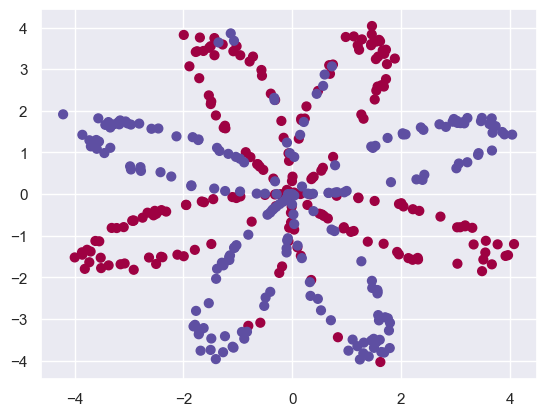

In [7]:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [8]:
layers = [7, 4, 1]
activations = ['tanh', 'tanh', 'sigmoid']
model = Model(input_shape, layers, activations)

In [9]:
num_iters = 100000
learning_rate = 0.0001
decay=True
normalized = False
optimizer = 'adam'
model.fit(X, Y, num_iters=num_iters,decay=decay,
           learning_rate=learning_rate, 
           tuning_param=1,optimizer=optimizer, normalized=normalized)

Running epoch 1 / 1
Running mini-batch 1 / 1
Iteration    0: Cost 0.82008873   
Iteration 10000: Cost 0.19898184   
Iteration 20000: Cost 0.15190499   
Iteration 30000: Cost 0.14155598   
Iteration 40000: Cost 0.13770447   
Iteration 50000: Cost 0.13574473   
Iteration 60000: Cost 0.13484635   
Iteration 70000: Cost 0.13430726   
Iteration 80000: Cost 0.13420417   
Iteration 90000: Cost 0.13417009   
Iteration 99999: Cost 0.13413302   


In [10]:
# Print accuracy

predictions = model.predict(X)
model.accuracy(predictions, Y)

Accuracy: 91%
